# Open Street Map

What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples

Lesson flow inspiration:
- https://youtu.be/QQmvq1cQHrk

In [1]:
import osmnx as ox
import geopandas as gpd

## Finding a place

<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

<div class="alert alert-danger">
    
Be careful! If your geography is too big (like Los Angeles, or Tokyo), it will take a loooooong time to donwload the data. Start small, think neighborhoods, like a zipcode, or Boyle Heights.

</div>

In [2]:
# find a place
place = 'university park, Los Angeles, ca'

In [3]:
# get it
graph = ox.graph_from_place(place)

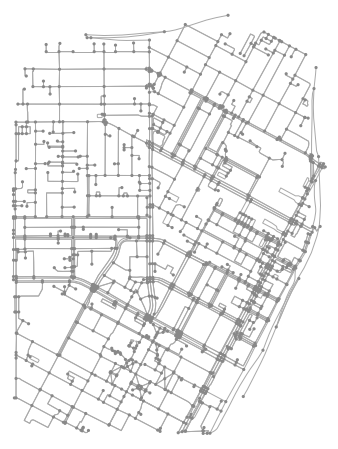

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
# plot it
ox.plot_graph(graph,
             bgcolor='#fff',
             edge_color='#aaa',
             node_color='#888',
             node_size=10)

<div class="alert alert-info">
    Try it yourself! Choose a city anywhere in the world, and display a map of its street network.
</div>

In [5]:
# convert this graph, networkx, to geodataframe
# it has two objects, nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

## Nodes

Nodes are street intersections

In [6]:
nodes.head()

,y,x,osmid,ref,highway,geometry
653731,34.036778,-118.287530,653731,13A,motorway_junction,POINT (-118.28753 34.03678)
20400292,34.027340,-118.276555,20400292,NaN,stop,POINT (-118.27655 34.02734)
21098539,34.025490,-118.291553,21098539,NaN,traffic_signals,POINT (-118.29155 34.02549)
21306060,34.023767,-118.284010,21306060,NaN,traffic_signals,POINT (-118.28401 34.02377)
63068610,34.025146,-118.287061,63068610,NaN,traffic_signals,POINT (-118.28706 34.02515)


<AxesSubplot:>

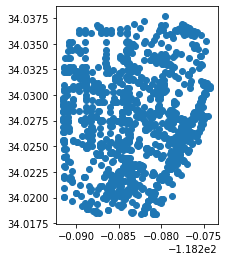

In [7]:
nodes.plot()

## Edges
Edges are street segments

In [8]:
edges.head()

,osmid,oneway,lanes,highway,length,bridge,geometry,name,maxspeed,access,service,ref,width,tunnel,u,v,key
0,"[148356745, 398749197]",True,2,motorway_link,403.032,yes,"LINESTRING (-118.28753 34.03678, -118.28651 34...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,653731,277327337,0
1,185399255,False,6,primary,22.690,NaN,"LINESTRING (-118.27655 34.02734, -118.27644 34...",Figueroa Street,NaN,NaN,NaN,NaN,NaN,NaN,20400292,5556117120,0
2,185399255,False,6,primary,29.278,NaN,"LINESTRING (-118.27655 34.02734, -118.27670 34...",Figueroa Street,NaN,NaN,NaN,NaN,NaN,NaN,20400292,6813513564,0
3,180996470,False,NaN,residential,113.699,NaN,"LINESTRING (-118.27655 34.02734, -118.27641 34...",West 27th Street,NaN,NaN,NaN,NaN,NaN,NaN,20400292,4835549605,0
4,113410487,True,2,primary,15.483,NaN,"LINESTRING (-118.29155 34.02549, -118.29140 34...",West Jefferson Boulevard,NaN,NaN,NaN,NaN,NaN,NaN,21098539,1286136440,0


<AxesSubplot:>

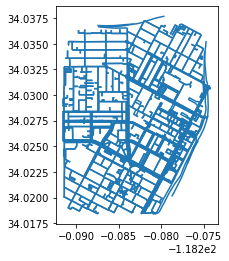

In [9]:
edges.plot()

## Areas
Areas are place boundary polygons

In [10]:
# get the place polygon
area = ox.geocode_to_gdf(place)

In [11]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-118.29156 34.03695, -118.29156 34.0...","University Park, Los Angeles, Los Angeles Coun...",34.037911,34.018394,-118.273974,-118.291563


<AxesSubplot:>

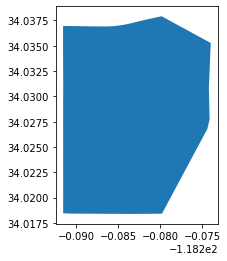

In [12]:
area.plot()

## Buildings footprints

You can also download building footprints as polygons. Since these are typically very large data, I recommend you search by specifying a radius of no more than 1000 meters.

In [13]:
buildings = ox.geometries_from_place(place, tags={'building':True})

In [14]:
type(buildings)

C:\Users\Yoh Kawano\.conda\envs\geo4\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [15]:
buildings.sample(3)

,unique_id,osmid,element_type,addr:state,building,ele,gnis:county_name,gnis:feature_id,gnis:import_uuid,gnis:reviewed,...,building:material,FIXME,ways,type,building:part,roof:material,roof:colour,ref,addr:country,addr:housename
216,way/407079369,407079369,way,NaN,house,61.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,way/427130976,427130976,way,NaN,garage,62.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,way/426605434,426605434,way,NaN,residential,71.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Yoh Kawano\.conda\envs\geo4\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

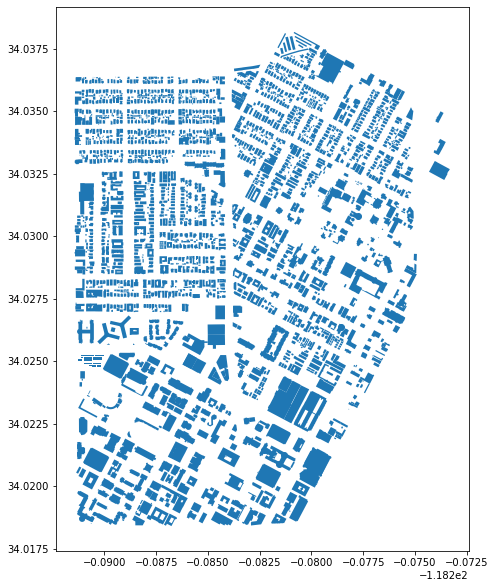

In [16]:
buildings.plot(figsize=(12,10))

C:\Users\Yoh Kawano\.conda\envs\geo4\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-118.29235126999998, -118.27241552999999, 34.01742052, 34.03917368)

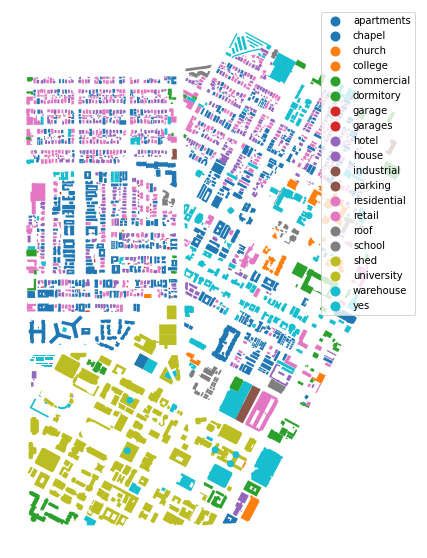

In [17]:
# spice it up a bit
map = buildings.plot(figsize=(12,10),column='building',legend=True)
map.axis('off')

In [ ]:
type(buildings)

## Kepler
Documentation: https://docs.kepler.gl/docs/keplergl-jupyter

In [ ]:
# how many buildings?
len(buildings)

Whoa, that's a lot. Kepler is a javascript library, meaning that you are limited to the ability of your computer power. Buildings are primarily represented as polygons, and rendering more than 5000 polygons could bog down your system. Let's try a different approach.

In [ ]:
buildings = ox.geometries_from_address(place,  tags={'building':True}, dist=1000)

In [ ]:
len(buildings)

In [ ]:
buildings.plot()

In [ ]:
buildings.plot()

In [ ]:
# Load an empty map
from keplergl import KeplerGl 
map_1 = KeplerGl(height=500)

In [ ]:
map_1.add_data(data=buildings)
map_1

In [ ]:
buildings.sample(50)

In [ ]:
b = buildings[['osmid','building','geometry']]

In [ ]:
type(b)

In [ ]:
b.query('geometry.str.contains("POINT")', engine='python')

In [ ]:
b.isna().sum()

In [ ]:
import folium
import sodapy
import geopandas

In [ ]:
m = folium.Map(location=[34.0360304,-118.2078525],zoom_start=14,tiles = 'CartoDB positron')
# plot chorpleth over the base map
folium.Choropleth(geo_data=b,                                # geo data
                  data=b, 
#                   key_on='feature.properties.FIPS',# data
#                   key_on='feature.properties.osmid', # feature.properties.key
                  columns=['osmid', 'building'],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  legend_name='White').add_to(m)    # name on the legend color bar

m

In [ ]:
print(buildings.iloc[10].geometry)

In [ ]:
graph_map = ox.plot_graph_folium(buildings)

## Points of interest

Points of interest
- https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.pois

List of tags, or "amenities"
- https://wiki.openstreetmap.org/wiki/Key:amenity

In [ ]:
# retrieve restaurants
restaurants = ox.pois_from_place(place, tags = {'amenity': ['restaurant']})
schools = ox.pois_from_place(place, tags = {'amenity': ['school']})

In [ ]:
# get all parks and bus stops in some neighborhood
tags = {'leisure': 'park',
        'highway': 'bus_stop'}
gdf = ox.geometries_from_place(place_name, tags)
gdf.shape

In [ ]:
len(schools)

## Plotting all this data

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))

# plot the area polygon
area.plot(ax=ax, facecolor='gainsboro')

# plot the street edges
edges.plot(ax=ax, edgecolor='gray', linewidth=0.5, alpha=0.7)

# plot building footprints
buildings.plot(ax=ax)

# plot restaurants
restaurants.plot(ax=ax,color='darkred',markersize=150)

# plot schools
schools.plot(ax=ax,color='orange',markersize=50)

In [ ]:
# what about parks?
leisure = ox.footprints_from_place(place_name, footprint_type='leisure')

In [ ]:
leisure.head()

In [ ]:
# distinct count?
leisure["leisure"].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

# plot the area polygon
area.plot(ax=ax, facecolor='gainsboro')

# plot the street edges
edges.plot(ax=ax, edgecolor='gray', linewidth=0.5, alpha=0.7)

# plot building footprints
buildings.plot(ax=ax)

# plot restaurants
restaurants.plot(ax=ax,color='darkred',markersize=50)

# plot schools
schools.plot(ax=ax,color='orange',markersize=50)

# plot green areas
leisure.plot(ax=ax,color='green')

In [ ]:
# neighborhoods or boroughs


gdf = ox.geocode_to_gdf('Los Angeles, Los Angeles, California, USA')


In [ ]:
# get the boundary polygon for manhattan, project it, and plot it
city = ox.geocode_to_gdf('Los Angeles, California, USA')

In [ ]:
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc='gray', ec='none',figsize=(10,10))
# ax = ax.axis('off')

In [ ]:
# define a bounding box in Culver City
north, south, east, west = 34.03, 33.99, -118.37, -118.42

# create network from that bounding box
G = ox.graph_from_bbox(north, south, east, west)
fig, ax = ox.plot_graph(G)

In [ ]:
ox.plot_graph_folium(G, edge_color='r')

In [ ]:
# define a point at UCLA
location_point = (34.069624774724886, -118.44500631093979)

# create network from point, inside bounding box of N, S, E, W each 750m from point
G = ox.graph_from_point(location_point, dist=750,
                        dist_type='bbox', network_type='all') # try "drive" and "walk"
fig, ax = ox.plot_graph(G)

In [ ]:
ox.plot_graph_folium(G,  edge_linewidth=1, edge_color='r')
# ox.plot_graph_folium(G)

In [ ]:
ox.basic_stats(G)

In [ ]:
# same point again, but create network only of nodes within 750m along the network from point
G = ox.graph_from_point(location_point, dist=750, 
                        dist_type='network')
fig, ax = ox.plot_graph(G, node_color='r')

In [ ]:
# network from address, including only nodes within 1km along the network from the address
G = ox.graph_from_address(address='UCLA, Los Angeles, CA', dist=1000,
                          dist_type='network', network_type='all')

fig, ax = ox.plot_graph(G, node_color='r')


In [ ]:
%%time
gdf = ox.footprints.footprints_from_place(place='UCLA, California, USA')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_footprints(gdf_proj)
# Image(fp, height=size, width=size)

In [ ]:
fig, ax = ox.plot_graph(G,
    ax=None,               #optionally draw on pre-existing axis
    figsize=(8, 8),        #figure size to create if ax is None
    bgcolor="#111111",     #background color of the plot
    node_color="w",        #color of the nodes
    node_size=15,          #size of the nodes: if 0, skip plotting them
    node_alpha=None,       #opacity of the nodes
    node_edgecolor="none", #color of the nodes' markers' borders
    node_zorder=1,         #zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
    edge_color="#999999",  #color of the edges
    edge_linewidth=1,      #width of the edges: if 0, skip plotting them
    edge_alpha=None,       #opacity of the edges
    show=True,             #if True, call pyplot.show() to show the figure
    close=False,           #if True, call pyplot.close() to close the figure: useful if plotting/saving many in a loop
    save=False,            #if True, save figure to disk at filepath
    filepath=None,         #if save is True, the path to the file
    dpi=300,               #if save is True, the resolution of saved file
    bbox=None)             #bounding box to constrain plot: if None, will calculate from spatial extents of graphＢ

In [ ]:
# get everything tagged amenity,
# and everything with landuse = retail or commercial,
# and everything with highway = bus_stop
tags = {'amenity' : True,
#         'landuse' : ['retail', 'commercial'],
#         'highway' : 'bus_stop'
       }
poi = ox.pois_from_place('Culver City, California, USA', tags)
poi.shape

In [ ]:
poi.head()

In [ ]:
poi.amenity.unique()

In [ ]:
poi.groupby(['amenity']).count()['osmid'].reset_index(name='count').sort_values(['count'], ascending=False)

In [ ]:
poi[poi.amenity=='school']

In [ ]:
poi[poi.amenity=='school'].plot(figsize=(10,10))

In [ ]:
# elevation. street nodes susceptible to flooding?
